
# Predicate the price for a given house with Linear Regression


## Our goal

According to the record we have, which includes some properties of houses, by applying linear regression, we want to predicate the price of a house with these properties.

The area of the house is 6500, and it has 4 bedrooms, 2 toliets, not on the mainroad, no guestroom, with a basement and a hotwaterheating, 2 parking slots, furnished and in the prefarea.

## A brief introduction

Dataset `house_price.csv`has records over 500 different houses information including there prices and properties

`house_price.csv` (the format of data, which is included in the data source)
- price：
- area
- bedrooms：
- bathrooms：
- stories：
- mainroad：
   - yes  
   - no	  
- guestroom：
   - yes  
   - no	  
- basement：
   - yes  
   - no	  
- hotwaterheating：
   - yes  
   - no	  
- airconditioning：
   - yes  
   - no	  
- parking：
- prefarea：
   - yes  
   - no	  
- furnishingstatus：
   - furnished       
   - semi-furnished	 
   - unfurnished     

## Load Dataset

import from csv file


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import the module we need, by using `read_csv`' function of Pandas, we import data from "house_price.csv" into the exercise,store them in `original_house_price`

In [60]:
original_house_price = pd.read_csv("./house_price.csv")
original_house_price.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Evaluate and Data cleaning

In this section, we will evaluate and clean the data contained in the original_house_price DataFrame established in the previous section.

We will mainly focus on two aspects: structure and content, which refer to tidiness and cleanliness, respectively.

Structural issues with the data refer to deviations from the three standards: "each variable as a column, each observation as a row, and each type of observational unit as a table." Content-related issues include the presence of missing data, duplicate data, invalid data, and so on.

To distinguish between the cleaned data and the original data, we create a new variable named `cleaned_house_price`, which is a copy of the `original_house_price` DataFrame. All subsequent cleaning steps will be applied to the `cleaned_house_price` DataFrame.

In [61]:
cleaned_house_price = original_house_price.copy()

### Structure

In [62]:
cleaned_house_price.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


From the first 10 rows of the data, it can be seen that the data conforms to the principle of "each variable as a column, each observation as a row, and each type of observational unit as a table." Therefore, there are no structural issues present.

### Content

Next, we will use the `info` method to get a general understanding of the data content.

In [63]:
cleaned_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


From the output, we can see that the `cleaned_house_price` DataFrame contains a total of 545 observations, and there are no missing values in the variables.

Regarding the data types, we observe that `mainroad`, `guestroom`, `basement`, `hotwaterheating`, `airconditioning`, `prefarea`, and `furnishingstatus` are categorical variables. Therefore, we can convert their data types to the Category type.

In [64]:
cleaned_house_price['mainroad'] = cleaned_house_price['mainroad'].astype("category")
cleaned_house_price['guestroom'] = cleaned_house_price['guestroom'].astype("category")
cleaned_house_price['basement'] = cleaned_house_price['basement'].astype("category")
cleaned_house_price['hotwaterheating'] = cleaned_house_price['hotwaterheating'].astype("category")
cleaned_house_price['airconditioning'] = cleaned_house_price['airconditioning'].astype("category")
cleaned_house_price['prefarea'] = cleaned_house_price['prefarea'].astype("category")
cleaned_house_price['furnishingstatus'] = cleaned_house_price['furnishingstatus'].astype("category")

In [65]:
cleaned_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


#### Dealing with missing data.

From the output of the `info` method, it can be observed that there are no missing values in the `cleaned_house_price` DataFrame. Therefore, there is no need to handle missing data.

#### Handling duplicate data.

Based on the meaning and content of the data variables, it is acceptable for variables to have duplicates. Therefore, there is no need to check for duplicate values in this data.

#### Handling inconsistent data.

Inconsistent data may exist in all categorical variables. We need to examine whether different values actually refer to the same target.

In [66]:
cleaned_house_price["mainroad"].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [67]:
cleaned_house_price["guestroom"].value_counts()

guestroom
no     448
yes     97
Name: count, dtype: int64

In [68]:
cleaned_house_price["basement"].value_counts()

basement
no     354
yes    191
Name: count, dtype: int64

In [69]:
cleaned_house_price["hotwaterheating"].value_counts()

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

In [70]:
cleaned_house_price["airconditioning"].value_counts()

airconditioning
no     373
yes    172
Name: count, dtype: int64

In [71]:
cleaned_house_price["prefarea"].value_counts()

prefarea
no     417
yes    128
Name: count, dtype: int64

In [72]:
cleaned_house_price["furnishingstatus"].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

From the above output, it can be seen that there are no inconsistent data present.

#### Dealing with invalid or erroneous data.

we can quickly understand the statistical information of numerical data using the `describe` method of the DataFrame.

In [73]:
cleaned_house_price.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


From the above statistical information, it can be seen that there are no values in `cleaned_house_price` that deviate from realistic meanings.

## Explore the Data

Before proceeding with inferential statistical analysis, we can first explore the distribution of numerical variables and variables that are correlated with house prices using data visualization. This will provide direction for further analysis.

In [74]:
# set the color of diagram to "pastel"
sns.set_palette("pastel")

### The distrbution of the house price

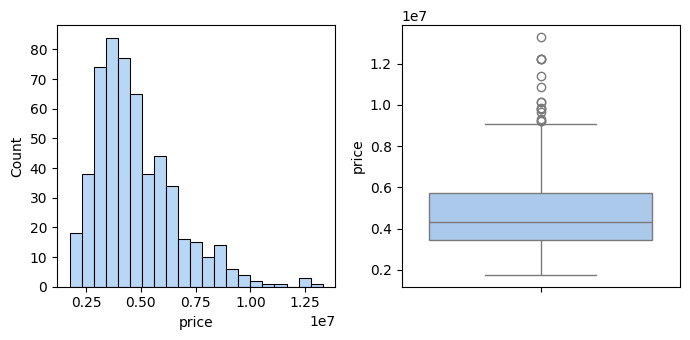

In [75]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
figure, axes = plt.subplots(1, 2)
sns.histplot(x=cleaned_house_price['price'], ax=axes[0])
sns.boxplot(y=cleaned_house_price['price'], ax=axes[1])
plt.show()

The house prices exhibit a right-skewed distribution, indicating that the majority of house prices in the dataset are moderate, but there are some extremely high prices that skew the mean upwards.

### The distrbution of area

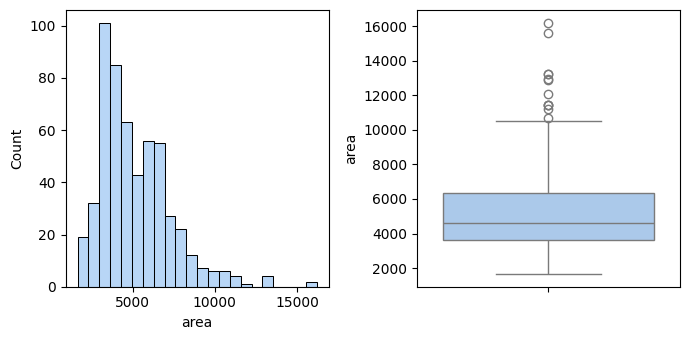

In [76]:
figure, axes = plt.subplots(1, 2)
sns.histplot(x=cleaned_house_price['area'], ax=axes[0])
sns.boxplot(y=cleaned_house_price['area'], ax=axes[1])
plt.show()

The distribution of area is similar to that of house prices, also exhibiting a right-skewed distribution.

### The relationship between house prices and area.

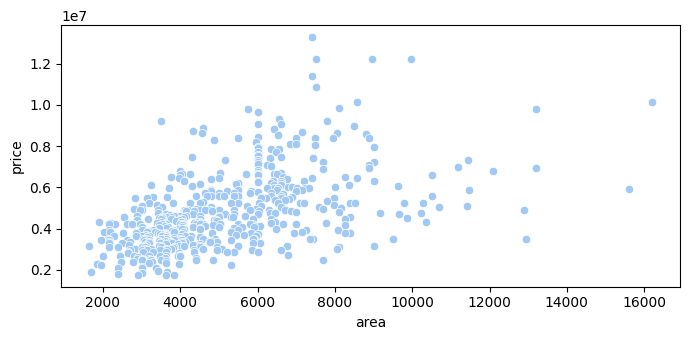

In [77]:
sns.scatterplot(data=cleaned_house_price, x='area', y='price')
plt.show()

From the scatter plot, it can be roughly observed that there is some positive correlation, but the strength of the relationship needs to be further determined by calculating the correlation coefficient.

### The number of bedrooms and house prices.

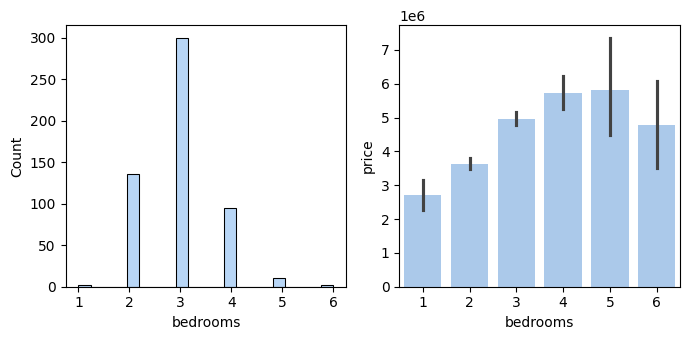

In [78]:
figure, axes = plt.subplots(1, 2)
sns.histplot(x=cleaned_house_price['bedrooms'], ax=axes[0])
sns.barplot(data=cleaned_house_price, x='bedrooms', y='price', ax=axes[1])
plt.show()

The number of bedrooms in this dataset ranges from 1 to 6, with the majority of houses having 2 to 4 bedrooms.

From the bar chart showing the average house prices by the number of bedrooms, it can be observed that houses with more bedrooms tend to have higher prices when the number of bedrooms is less than 5. However, once the number of bedrooms exceeds 5, the prices do not necessarily increase accordingly.

### The number of bathrooms and house prices.

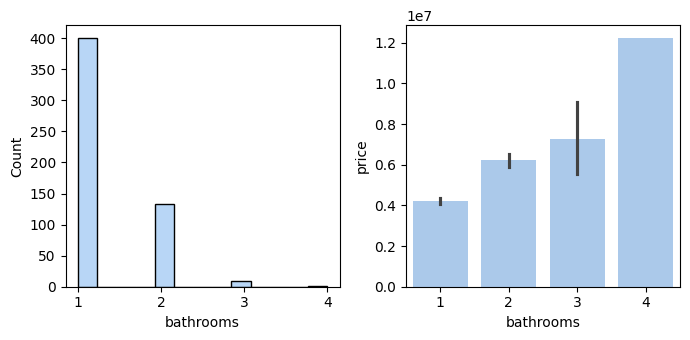

In [79]:
figure, axes = plt.subplots(1, 2)
sns.histplot(x=cleaned_house_price['bathrooms'], ax=axes[0])
sns.barplot(data=cleaned_house_price, x='bathrooms', y='price', ax=axes[1])
plt.show()

In the dataset, houses have a minimum of 1 bathroom and a maximum of 4 bathrooms, with the majority having 1 bathroom.

From the bar chart showing the average house prices by the number of bathrooms, it can be observed that houses with more bathrooms tend to have higher prices.

### The number of floors and house prices.

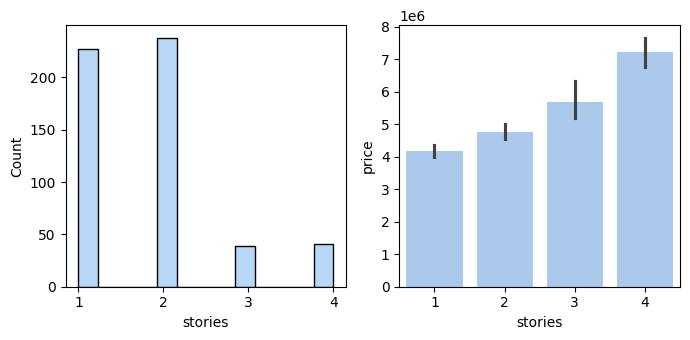

In [80]:
figure, axes = plt.subplots(1, 2)
sns.histplot(data=cleaned_house_price, x='stories', ax=axes[0])
sns.barplot(data=cleaned_house_price, x='stories', y='price', ax=axes[1])
plt.show()

The number of floors in this dataset ranges from 1 to 4, with the majority of houses having 1 or 2 floors.

From the bar chart showing the average house prices by the number of floors, it can be observed that houses with more floors tend to have higher prices.

### Parking slots and house price

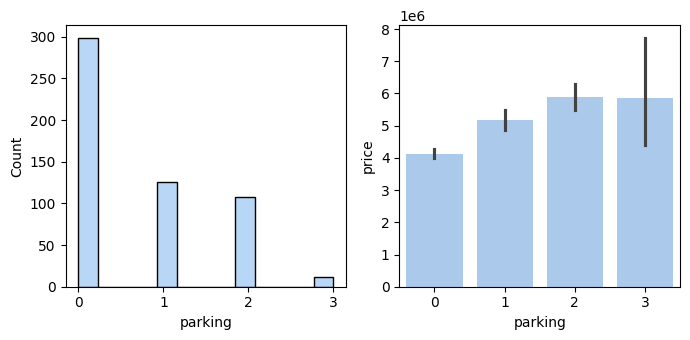

In [81]:
figure, axes = plt.subplots(1, 2)
sns.histplot(data=cleaned_house_price, x='parking', ax=axes[0])
sns.barplot(data=cleaned_house_price, x='parking', y='price', ax=axes[1])
plt.show()

The number of garages in this dataset ranges from 0 to 3, with the highest number of houses being without a garage, followed by 1 and 2 garages.

From the bar chart showing the average house prices by the number of garages, it can be observed that houses with more garages tend to have higher prices. However, once the number of garages exceeds 2, the prices do not necessarily increase accordingly.

### The location on the main road and house prices.

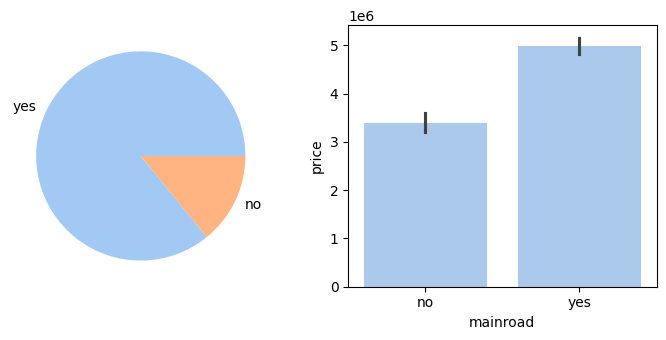

In [82]:
figure, axes = plt.subplots(1, 2)
mainroad_count = cleaned_house_price['mainroad'].value_counts()
mainroad_label = mainroad_count.index
axes[0].pie(mainroad_count, labels=mainroad_label)
sns.barplot(data=cleaned_house_price, x='mainroad', y='price', ax=axes[1])
plt.show()

In this dataset, the majority of houses are located on the main road.

From the bar chart showing the average house prices by the location on the main road, it can be observed that houses located on the main road tend to have higher prices.

### The presence of a guest room and house prices.

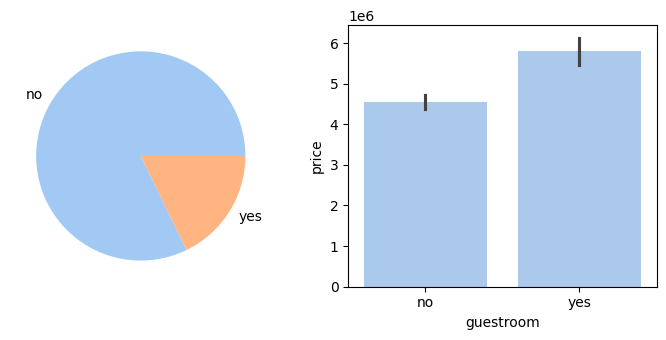

In [83]:
figure, axes = plt.subplots(1, 2)
guestroom_count = cleaned_house_price['guestroom'].value_counts()
guestroom_label = guestroom_count.index
axes[0].pie(guestroom_count, labels=guestroom_label)
sns.barplot(data=cleaned_house_price, x='guestroom', y='price', ax=axes[1])
plt.show()

In this dataset, the majority of houses do not have a guest room.

From the bar chart showing the average house prices by the presence of a guest room, it can be observed that houses with a guest room tend to have higher prices.

### Basement and house price

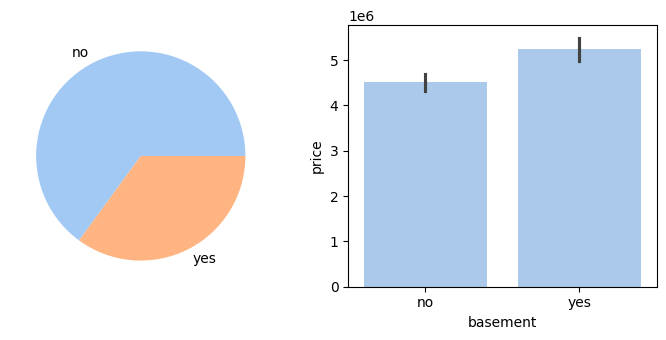

In [84]:
figure, axes = plt.subplots(1, 2)
basement_count = cleaned_house_price['basement'].value_counts()
basement_label = basement_count.index
axes[0].pie(basement_count, labels=basement_label)
sns.barplot(data=cleaned_house_price, x='basement', y='price', ax=axes[1])
plt.show()

In this dataset, more houses do not have a basement.

From the bar chart showing the average house prices by the presence of a basement, it can be observed that houses with a basement tend to have higher prices.

### Hotwaterheating and house price

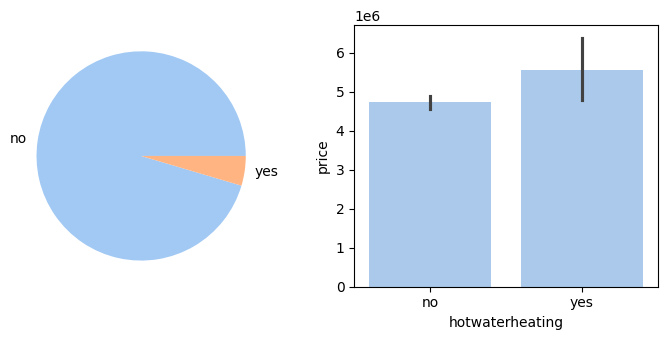

In [85]:
figure, axes = plt.subplots(1, 2)
hotwaterheating_count = cleaned_house_price['hotwaterheating'].value_counts()
hotwaterheating_label = hotwaterheating_count.index
axes[0].pie(hotwaterheating_count, labels=hotwaterheating_label)
sns.barplot(data=cleaned_house_price, x='hotwaterheating', y='price', ax=axes[1])
plt.show()

In this dataset, the vast majority of houses do not have a hot water heating system.

From the bar chart showing the average house prices by the presence of a hot water heating system, it can be observed that houses with a hot water heating system tend to have higher prices.

### Airconditioning and hosue price

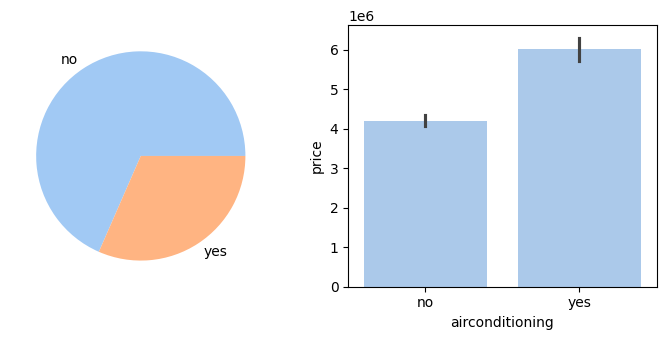

In [86]:
figure, axes = plt.subplots(1, 2)
airconditioning_count = cleaned_house_price['airconditioning'].value_counts()
airconditioning_label = hotwaterheating_count.index
axes[0].pie(airconditioning_count, labels=airconditioning_label)
sns.barplot(data=cleaned_house_price, x='airconditioning', y='price', ax=axes[1])
plt.show()

In this dataset, more houses do not have air conditioning.

From the bar chart showing the average house prices by the presence of air conditioning, it can be observed that houses with air conditioning tend to have higher prices.

### The location in the preferred area of the city and house prices.

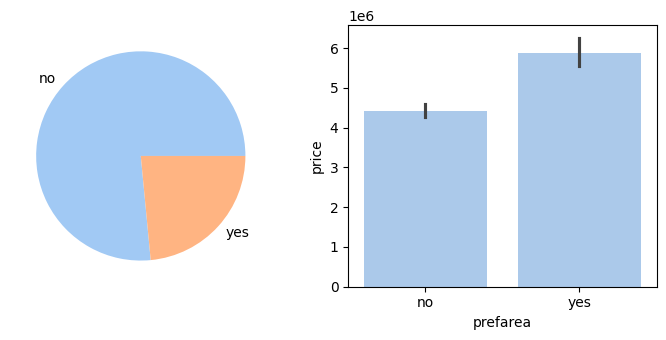

In [87]:
figure, axes = plt.subplots(1, 2)
prefarea_count = cleaned_house_price['prefarea'].value_counts()
prefarea_label = prefarea_count.index
axes[0].pie(prefarea_count, labels=prefarea_label)
sns.barplot(data=cleaned_house_price, x='prefarea', y='price', ax=axes[1])
plt.show()

In this dataset, the majority of houses are not located in the preferred area of the city.

From the bar chart showing the average house prices by the location in the preferred area of the city, it can be observed that houses located in the preferred area tend to have higher prices.

### The furnishing status and house prices.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_18516\4028414711.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, horizontalalignment='right')


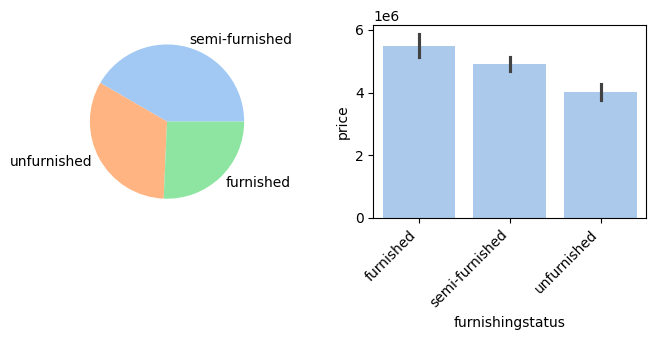

In [88]:
figure, axes = plt.subplots(1, 2)
furnishingstatus_count = cleaned_house_price['furnishingstatus'].value_counts()
furnishingstatus_label = furnishingstatus_count.index
axes[0].pie(furnishingstatus_count, labels=furnishingstatus_label)
sns.barplot(data=cleaned_house_price, x='furnishingstatus', y='price', ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In this dataset, there are more houses with basic furnishings and unfinished houses, while around one-fourth of the houses are fully furnished.

From the bar chart showing the average house prices by the furnishing status, it can be observed that houses with full furnishings have higher prices compared to those with basic furnishings, and houses with basic furnishings have higher prices compared to unfinished houses.

## Data Analysis

In the analysis step, we will utilize the data from `cleaned_house_price` to perform linear regression analysis. The goal is to obtain a mathematical model that can predict house prices based on various attributes of the house.

First, we will import the necessary modules for linear regression.

In [89]:
import statsmodels.api as sm

Then, we can create a new DataFrame named `lr_house_price` to serve as the data for our linear regression analysis.

The reason for distinguishing it from `cleaned_house_price` is that we may need to prepare the data before conducting regression analysis, such as introducing dummy variables. These preparations can be performed on `lr_house_price`.

In [90]:
lr_house_price = cleaned_house_price.copy()

Since there are categorical variables in the data, we cannot directly build a linear regression model. We need to introduce dummy variables, which represent whether or not an observation belongs to a particular category by using 0s and 1s.

In [91]:
lr_house_price = pd.get_dummies(lr_house_price, drop_first=True, columns=['mainroad', 'guestroom',
                                                         'basement', 'hotwaterheating',
                                                         'airconditioning','prefarea', 
                                                         'furnishingstatus'], dtype=int)
lr_house_price

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


Next, we need to separate the dependent variable and independent variables.

The dependent variable is the `price` variable because our purpose in conducting linear regression is to obtain a model that can predict sales prices based on other variables that may affect house prices.

In [92]:
y = lr_house_price['price']

We can include all variables except for the price as independent variables, but we need to examine their correlations. If some variables have high correlations with each other, it may lead to multicollinearity.

In [93]:
x = lr_house_price.drop('price', axis=1)

Generally, when the absolute value of the correlation coefficient is greater than 0.8, it may lead to severe multicollinearity. So, when we check, we look for values with an absolute value greater than 0.8.

In [94]:
x.corr().abs() > 0.8

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
area,True,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False
stories,False,False,False,True,False,False,False,False,False,False,False,False,False
parking,False,False,False,False,True,False,False,False,False,False,False,False,False
mainroad_yes,False,False,False,False,False,True,False,False,False,False,False,False,False
guestroom_yes,False,False,False,False,False,False,True,False,False,False,False,False,False
basement_yes,False,False,False,False,False,False,False,True,False,False,False,False,False
hotwaterheating_yes,False,False,False,False,False,False,False,False,True,False,False,False,False
airconditioning_yes,False,False,False,False,False,False,False,False,False,True,False,False,False


From the above output, the absolute values of the correlation coefficients between different variables are all less than or equal to 0.8.

Next, we add an intercept to the linear equation of the model.

In [95]:
x = sm.add_constant(x)
x

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,1.0,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,1.0,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,1.0,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,1.0,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.0,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1.0,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1.0,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1.0,2910,3,1,1,0,0,0,0,0,0,0,0,0


The next step is to call the OLS function to use the method of ordinary least squares (OLS) to obtain the parameter values of the linear regression model.

In [96]:
model = sm.OLS(y, x).fit()

To examine the results of the model, we use the `summary` method to obtain summary information.

In [97]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Mon, 22 Apr 2024   Prob (F-statistic):          9.07e-123
Time:                        07:07:38   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.277e+04   2.64e+05      0.162      0.872   -4.76e+05    5.62e+05
area                              244.1394     24.289     10.052      0.000     196.425     291.853
bedrooms                         1.148e+05   7.26e+04      1.581      0.114   -2.78e+04    2.57e+05
bathrooms                        9.877e+05   1.03e+05      9.555      0.000    7.85e+05    1.19e+06
stories                          4.508e+05   6.42e+04      7.026      0.000    3.25e+05    5.77e+05
parking                          2.771e+05   5.85e+04      4.735      0.000    1.62e+05    3.92e+05
mainroad_yes                     4.213e+05   1.42e+05      2.962      0.003    1.42e+05    7.01e+05
guestroom_yes                    3.005e+05   1.32e+05      2.282      0.023    4.18e+04    5.59e+05
basement_yes                     3.501e+05    1.1e+05      3.175      0.002    1.33e+05    5.67e+05
hotwaterheating_yes              8.554e+05   2.23e+05      3.833      0.000    4.17e+05    1.29e+06
airconditioning_yes               8.65e+05   1.08e+05      7.983      0.000    6.52e+05    1.08e+06
prefarea_yes                     6.515e+05   1.16e+05      5.632      0.000    4.24e+05    8.79e+05
furnishingstatus_semi-furnished -4.634e+04   1.17e+05     -0.398      0.691   -2.75e+05    1.83e+05
furnishingstatus_unfurnished    -4.112e+05   1.26e+05     -3.258      0.001   -6.59e+05   -1.63e+05
==============================================================================
Omnibus:                       97.909   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.281
Skew:                           0.895   Prob(JB):                     8.22e-57
Kurtosis:                       5.859   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

When we set the significance level to 0.05, the p-values from the above results indicate that the model considers the following factors to have no significant impact on house prices: the number of bedrooms and whether the house is in basic condition. Additionally, the p-value for the constant term (representing the intercept of the linear equation) is also large, indicating no significant influence.

We can remove these variables and rebuild the linear regression model.

In [98]:
x = x.drop(['const', 'bedrooms', 'furnishingstatus_semi-furnished'], axis=1)

In [99]:
model = sm.OLS(y, x).fit()

In [100]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1088.
Date:                Mon, 22 Apr 2024   Prob (F-statistic):                        0.00
Time:                        07:07:38   Log-Likelihood:                         -8333.5
No. Observations:                 545   AIC:                                  1.669e+04
Df Residuals:                     534   BIC:                                  1.674e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
area                           257.5854     22.577     11.409      0.000     213.234     301.936
bathrooms                     1.071e+06   9.27e+04     11.553      0.000    8.89e+05    1.25e+06
stories                       5.084e+05   5.71e+04      8.898      0.000    3.96e+05    6.21e+05
parking                       2.793e+05   5.83e+04      4.794      0.000    1.65e+05    3.94e+05
mainroad_yes                  4.672e+05   1.27e+05      3.679      0.000    2.18e+05    7.17e+05
guestroom_yes                 2.851e+05   1.31e+05      2.172      0.030    2.72e+04    5.43e+05
basement_yes                  4.016e+05   1.07e+05      3.765      0.000    1.92e+05    6.11e+05
hotwaterheating_yes           8.668e+05   2.23e+05      3.884      0.000    4.28e+05    1.31e+06
airconditioning_yes           8.543e+05   1.07e+05      7.952      0.000    6.43e+05    1.07e+06
prefarea_yes                  6.443e+05   1.15e+05      5.594      0.000    4.18e+05    8.71e+05
furnishingstatus_unfurnished -3.493e+05   9.49e+04     -3.679      0.000   -5.36e+05   -1.63e+05
==============================================================================
Omnibus:                       94.840   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.889
Skew:                           0.865   Prob(JB):                     2.01e-55
Kurtosis:                       5.845   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As we can see, when we remove the independent variables with large p-values from the linear regression model, the value of R-squared increases from 0.682 to 0.957, indicating an improvement in the model's fit to the existing data.

According to the coefficients of each independent variable in the linear regression equation, the model predicts that the following factors will significantly increase house prices when they increase (or are present): house area, number of bathrooms, number of floors, garage capacity, located on the main road, having a guest room, having a basement, having a water heater, having air conditioning, and being in the preferred community.

The linear regression model predicts that the following factors will significantly decrease house prices when they increase (or are present): houses not renovated, being in basic condition.

## Information of the house needed to predict price:：

The area of the house is 6500, and it has 4 bedrooms, 2 toliets, not on the mainroad, no guestroom, with a basement and a hotwaterheating, 2 parking slots, furnished and in the prefarea.

In [101]:
price_to_predict = pd.DataFrame({'area': [6500], 'bedrooms': [4], 'bathrooms': [2], 
                                 'stories': [2], 'mainroad': ['no'], 'guestroom': ['no'],
                                 'basement': ['yes'], 'hotwaterheating': ['yes'],
                                 'airconditioning': ['no'], 'parking': 2, 'prefarea': ['yes'],
                                 'furnishingstatus': ['semi-furnished']})
price_to_predict

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,6500,4,2,2,no,no,yes,yes,no,2,yes,semi-furnished


We need to convert the categorical variables to the Category type and use the `categories` parameter to let the program know all possible categorical values. The reason for this is that the categorical values in the prediction data may not be complete. We need to ensure that when introducing dummy variables, no categories are missed.

In [102]:
price_to_predict['mainroad'] = pd.Categorical(price_to_predict['mainroad'], categories=['no', 'yes'])
price_to_predict['guestroom'] = pd.Categorical(price_to_predict['guestroom'], categories=['no', 'yes'])
price_to_predict['basement'] = pd.Categorical(price_to_predict['basement'], categories=['no', 'yes'])
price_to_predict['hotwaterheating'] = pd.Categorical(price_to_predict['hotwaterheating'], categories=['no', 'yes'])
price_to_predict['airconditioning'] = pd.Categorical(price_to_predict['airconditioning'], categories=['no', 'yes'])
price_to_predict['prefarea'] = pd.Categorical(price_to_predict['prefarea'], categories=['no', 'yes'])
price_to_predict['furnishingstatus'] = pd.Categorical(price_to_predict['furnishingstatus'], categories=['furnished', 'semi-furnished', 'unfurnished'])

Next, introduce dummy variables for categorical variables.

In [103]:
price_to_predict = pd.get_dummies(price_to_predict, drop_first=True, 
                                  columns=['mainroad', 'guestroom',
                                           'basement', 'hotwaterheating',
                                           'airconditioning','prefarea', 
                                           'furnishingstatus'], dtype=int)
price_to_predict.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,6500,4,2,2,2,0,0,1,1,0,1,1,0


In [104]:
price_to_predict = price_to_predict.drop(['bedrooms', 'furnishingstatus_semi-furnished'], axis=1)

Next, we can call the `predict` method of the linear regression model to obtain predicted prices.

In [105]:
predicted_value = model.predict(price_to_predict)
predicted_value

0    7.303754e+06
dtype: float64

The price predicted by the linear regression model is 7,303,754.